# Bank loan approval prediction

This notebook covers the task of an installment loan approval prediction.

We are going to use the dataset available at Kaggle: [link](https://www.kaggle.com/datasets/dimabutko/making-a-credit-in-the-bank)

First, let's download the dataset.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dimabutko/making-a-credit-in-the-bank")

print("Path to dataset files:", path)

100%|██████████| 1.82M/1.82M [00:00<00:00, 117MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dimabutko/making-a-credit-in-the-bank/versions/1


Now, let's take load the data into Pandas, and have a look at it.

In [ ]:
import os
print(os.listdir(path))

['bank.csv']


We have to consider the fact that our CSV is, in fact, semicolon-delimited, not comma-delimited, and specify the *delimiter* parameter for the *read_csv* function.

In [ ]:
import pandas as pd
def load_bank_data():
    csv_path = os.path.join(path, "bank.csv")
    return pd.read_csv(csv_path, delimiter=';')

In [ ]:
bank_data = load_bank_data()

In [ ]:
bank_data.head()

,statement_id,first_payment,credit_amount,credit_term,Income_norm,income_sum,income_sum_confirmed,month_payment,gender_norm,family_children,marriage,job_experience_year,job_general_experience_year,family_years,Education_norm,Age,job_is_official,work_position,Decision
0,907265,25.4,1505135.00,60,0.38,100000,0,37800.0,1,1,1,16,40,32,2,59,0,head_of_department,1
1,754448,45.6,2026699.39,36,0.08,335000,0,26060.0,1,0,1,4,14,8,4,37,0,specialist,1
2,1226984,80.0,608440.00,24,0.25,130000,0,32420.0,1,0,1,1,27,8,4,52,0,specialist,1
3,1302527,73.9,530000.00,60,0.09,150000,0,14000.0,0,0,1,4,10,37,4,65,0,specialist,1
4,1066046,30.9,1691240.00,84,0.24,150000,0,35536.3,0,1,1,5,20,12,2,43,0,specialist,0


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75829 entries, 0 to 75828
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   statement_id                 75829 non-null  int64  
 1   first_payment                75829 non-null  float64
 2   credit_amount                75829 non-null  float64
 3   credit_term                  75829 non-null  int64  
 4   Income_norm                  75805 non-null  float64
 5   income_sum                   75829 non-null  int64  
 6   income_sum_confirmed         75829 non-null  int64  
 7   month_payment                75829 non-null  float64
 8   gender_norm                  75829 non-null  int64  
 9   family_children              75829 non-null  int64  
 10  marriage                     75829 non-null  int64  
 11  job_experience_year          75829 non-null  int64  
 12  job_general_experience_year  75829 non-null  int64  
 13  family_years    

As we can see, there is a total of 19 columns in the dataset, of which only one is non-numerical. Column **Decision** will be our target, with the vaule **1** denoting acceptance of the loan, and **0** a rejection.

We are going to take a few assumptions:
- removal of the column **statement_id** - it is unnecessary for us
- removal of the column **Income_norm** - it is just a normalized column of a client's income amount, thus being unnecessary for us,
- removal of the **Income_sum_confirmed** - this column should contain data about the amount of each client's confirmed income, but the data seems to be missing,
- removal of the **job_is_official** column - this column should contain data whether a job is "official", which is an unclear statement to me. Additionally, this column is extremely unbalanced.

Let's employ our assumptions and proceed further.

In [ ]:
# Remove the columns mentioned above
bank_data_prepared = bank_data.drop(columns=['Income_norm', 'income_sum_confirmed', 'job_is_official', 'statement_id'])

In [ ]:
bank_data_prepared.head()

,first_payment,credit_amount,credit_term,income_sum,month_payment,gender_norm,family_children,marriage,job_experience_year,job_general_experience_year,family_years,Education_norm,Age,work_position,Decision
0,25.4,1505135.00,60,100000,37800.0,1,1,1,16,40,32,2,59,head_of_department,1
1,45.6,2026699.39,36,335000,26060.0,1,0,1,4,14,8,4,37,specialist,1
2,80.0,608440.00,24,130000,32420.0,1,0,1,1,27,8,4,52,specialist,1
3,73.9,530000.00,60,150000,14000.0,0,0,1,4,10,37,4,65,specialist,1
4,30.9,1691240.00,84,150000,35536.3,0,1,1,5,20,12,2,43,specialist,0


In [ ]:
bank_data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75829 entries, 0 to 75828
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   first_payment                75829 non-null  float64
 1   credit_amount                75829 non-null  float64
 2   credit_term                  75829 non-null  int64  
 3   income_sum                   75829 non-null  int64  
 4   month_payment                75829 non-null  float64
 5   gender_norm                  75829 non-null  int64  
 6   family_children              75829 non-null  int64  
 7   marriage                     75829 non-null  int64  
 8   job_experience_year          75829 non-null  int64  
 9   job_general_experience_year  75829 non-null  int64  
 10  family_years                 75829 non-null  int64  
 11  Education_norm               75829 non-null  int64  
 12  Age                          75829 non-null  int64  
 13  work_position   

As we can see, not we've got just 16 columns, one of them still being non-numeric. Let's rename the columns to better display their meaning.

In [ ]:
bank_data_prepared.rename(columns={
  "income_sum" : "income",
  "gender_norm" : "gender",
  "family_children" : "number_of_children",
  "marriage" : "married",
  "job_experience_year" : "current_job_experience",
  "job_general_experience_year" : "general_job_experience",
  "family_years" : "years_married",
  "Education_norm" : "education",
  "Age" : "age",
  "Decision" : "decision"
 }, inplace=True)

In [ ]:
bank_data_prepared.head()

,first_payment,credit_amount,credit_term,income,month_payment,gender,number_of_children,married,current_job_experience,general_job_experience,years_married,education,age,work_position,decision
0,25.4,1505135.00,60,100000,37800.0,1,1,1,16,40,32,2,59,head_of_department,1
1,45.6,2026699.39,36,335000,26060.0,1,0,1,4,14,8,4,37,specialist,1
2,80.0,608440.00,24,130000,32420.0,1,0,1,1,27,8,4,52,specialist,1
3,73.9,530000.00,60,150000,14000.0,0,0,1,4,10,37,4,65,specialist,1
4,30.9,1691240.00,84,150000,35536.3,0,1,1,5,20,12,2,43,specialist,0


In [ ]:
bank_data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75829 entries, 0 to 75828
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   first_payment           75829 non-null  float64
 1   credit_amount           75829 non-null  float64
 2   credit_term             75829 non-null  int64  
 3   income                  75829 non-null  int64  
 4   month_payment           75829 non-null  float64
 5   gender                  75829 non-null  int64  
 6   number_of_children      75829 non-null  int64  
 7   married                 75829 non-null  int64  
 8   current_job_experience  75829 non-null  int64  
 9   general_job_experience  75829 non-null  int64  
 10  years_married           75829 non-null  int64  
 11  education               75829 non-null  int64  
 12  age                     75829 non-null  int64  
 13  work_position           75829 non-null  object 
 14  decision                75829 non-null

Great. Now let's dive deeper into the data. We can see that we have no NULL values in our dataset, which is great - we do not have to worry about handling them.

Let's create a description and histograms for our data to let us look at their distrbution.



In [ ]:
bank_data_prepared.describe()

,first_payment,credit_amount,credit_term,income,month_payment,gender,number_of_children,married,current_job_experience,general_job_experience,years_married,education,age,decision
count,75829.000000,7.582900e+04,75829.000000,7.582900e+04,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000
mean,44.593653,1.560930e+06,54.795606,1.649018e+05,43546.930673,0.659972,0.695618,0.735748,6.869417,18.755028,10.117712,3.634216,41.949267,0.792744
std,23.061883,7.570951e+05,27.670361,6.162293e+05,21953.874128,0.473721,0.878743,0.440937,6.759724,9.097406,10.366536,0.759662,9.597238,0.405343
min,0.000000,7.899000e+04,12.000000,0.000000e+00,2675.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,23.700000,9.871160e+05,24.000000,1.000000e+05,28860.000000,0.000000,0.000000,0.000000,2.000000,12.000000,0.000000,4.000000,35.000000,1.000000
50%,45.600000,1.430000e+06,60.000000,1.500000e+05,39600.000000,1.000000,0.000000,1.000000,5.000000,18.000000,8.000000,4.000000,41.000000,1.000000
75%,62.000000,2.009240e+06,84.000000,2.000000e+05,52200.000000,1.000000,1.000000,1.000000,10.000000,25.000000,16.000000,4.000000,48.000000,1.000000
max,99.500000,6.163624e+06,96.000000,1.650005e+08,305987.950000,1.000000,6.000000,1.000000,40.000000,40.000000,40.000000,5.000000,124.000000,1.000000


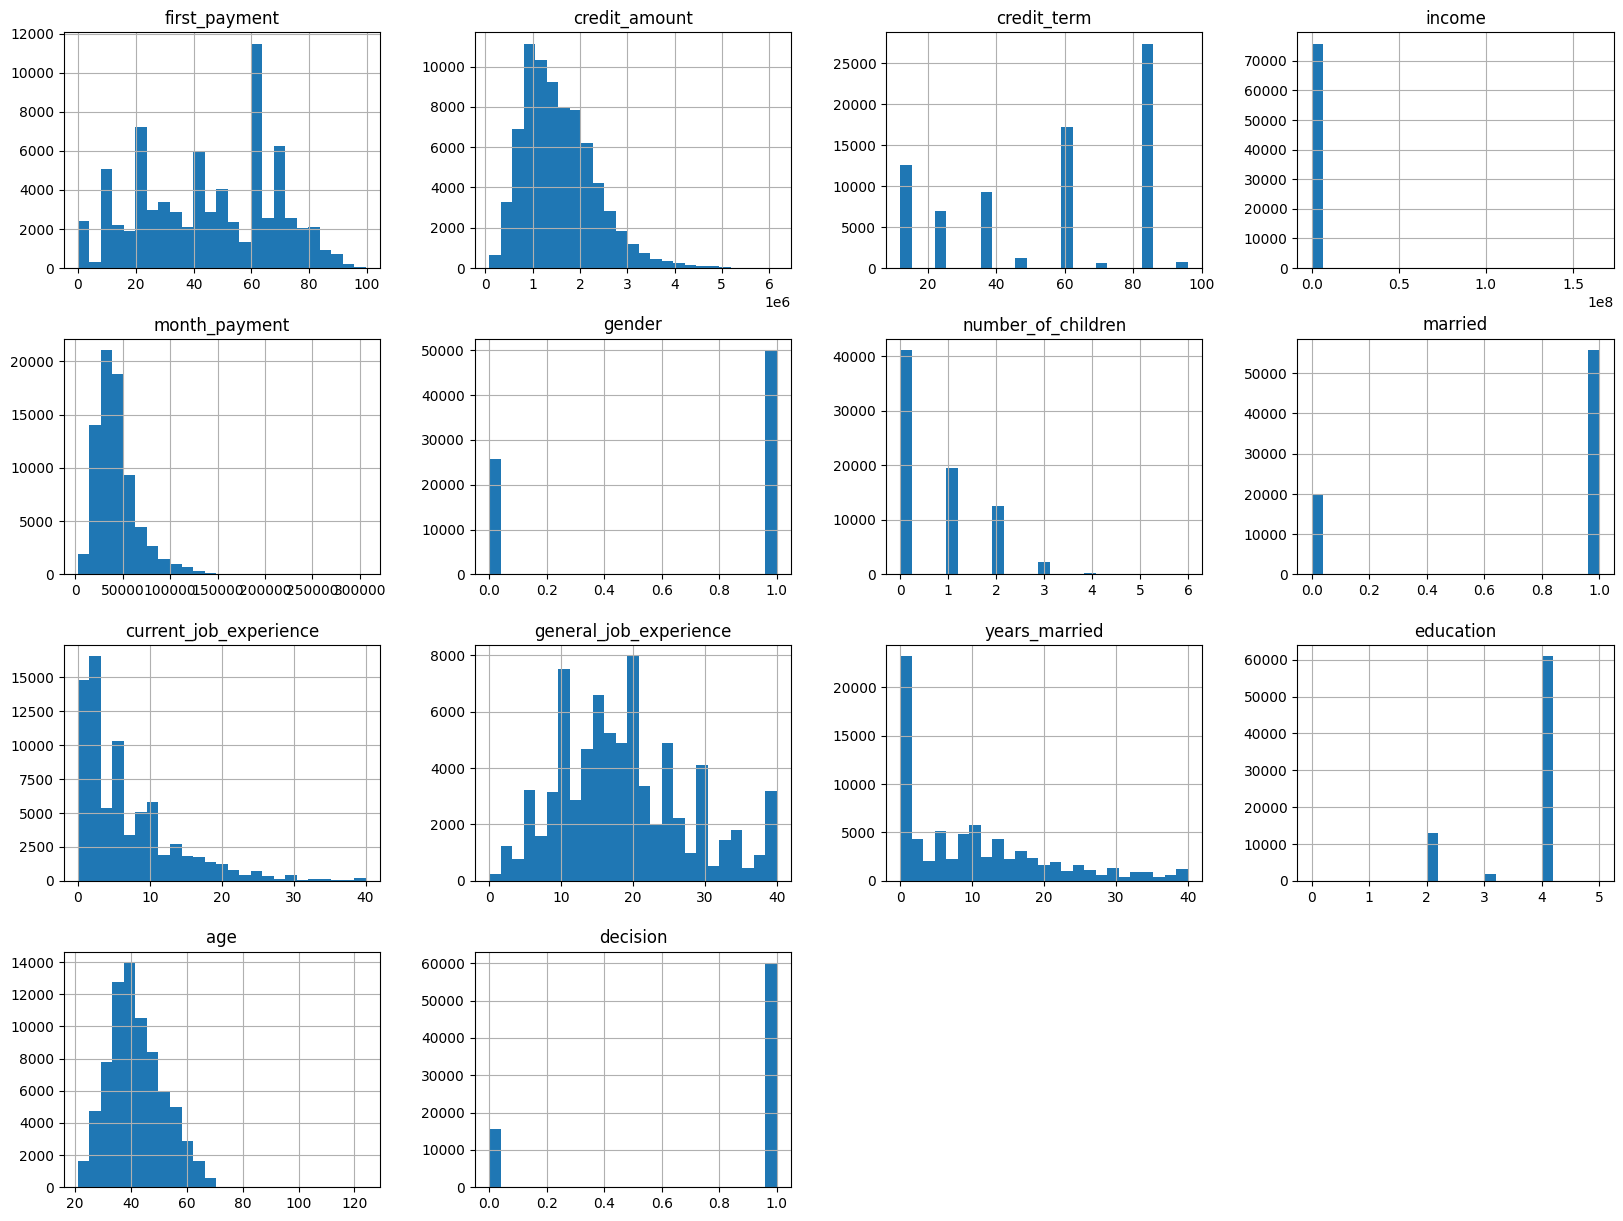

In [ ]:
import matplotlib.pyplot as plt
bank_data_prepared.hist(bins=25, figsize=(20,15))
plt.show()

We can instantly make a few observations:
1. There are outliers in terms of the income - the histogram is extremely skewed right, due to the fact that those outliers are so extreme.
2. Most of the data is skewed right - it is natural given the fact that most of the loans are not going to be extremely big, because most of the people do not earn enough money to even try applying for a huge loan.
3. The attributes vary in scale and units.

Let's try to remove the extreme outliers before proceeding to creating a testing dataset.

In [ ]:
# We suppress scientific notation, because it's problematic for our plots
pd.reset_option('display.float_format', silent=True)

bank_data_prepared.income.head(10)

,income
0,100000
1,335000
2,130000
3,150000
4,150000
5,80000
6,100000
7,180000
8,150000
9,200000


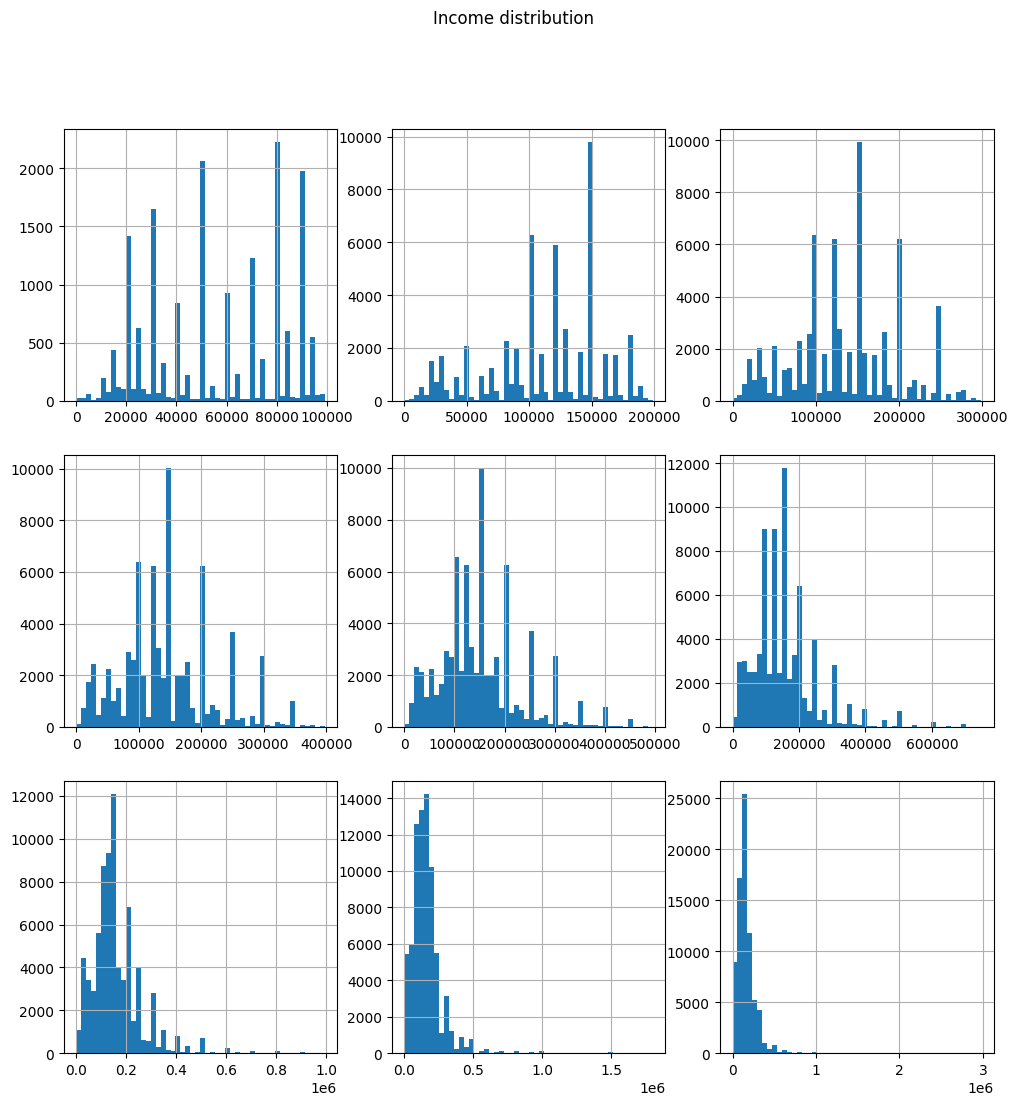

In [ ]:
# First let's create a more detailed histogram for various income thresholds.
incomes = [[100_000, 200_000, 300_000], [400_000, 500_000, 750_000], [1_000_000, 2_000_000, 3_000_000]]
fig, axs = plt.subplots(3, 3, figsize=(12,12))
fig.suptitle('Income distribution')
for i, item in enumerate(incomes):
  for j, income in enumerate(item):
    bank_data_prepared.income[bank_data_prepared.income < income].hist(bins=50, ax=axs[i,j])
plt.show()

As we can see, almost all samples have income below 500 thousand dollars a year. Let's remove all the samples with income higher than that, and see how it looks.

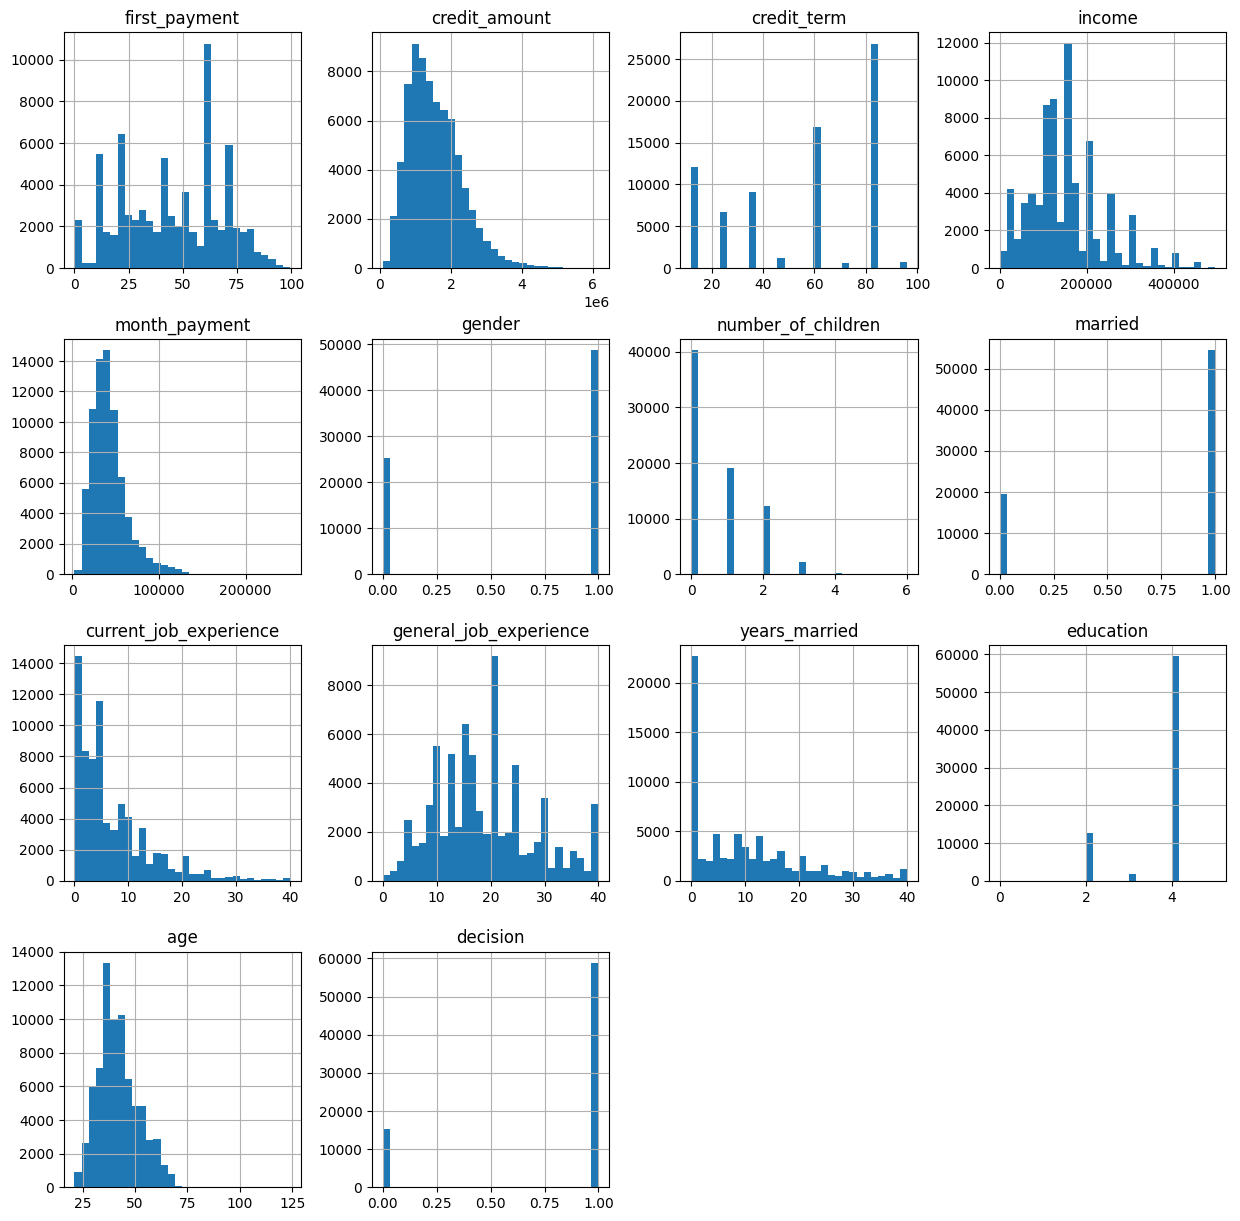

In [ ]:
# Remove the outliers from dataset
bank_data_cleared = bank_data_prepared[bank_data_prepared.income < 500_000]

# Display the results after filtering
bank_data_cleared.hist(bins=30, figsize=(15,15))
plt.show()

As we can see, after the outlier removal our data looks much better - even though it's still skewed right, we should be able to work with it.

Additionally, the data contains exactly 4 rows, in which the **education** column has no information about the education. Let's drop those rows before splitting the datasets.

In [ ]:
bank_data_cleared.drop(bank_data_cleared[~bank_data_cleared.education.isin([1,2,3,4,5])].index, inplace=True)

<ipython-input-18-58b577306384>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data_cleared.drop(bank_data_cleared[~bank_data_cleared.education.isin([1,2,3,4,5])].index, inplace=True)


Now, before we move to further data processing, let's create a **test set** - we shall leave 10% of our new data pool for the testing purposes, and not touch it until we develop the final model.

We are going to use **stratified sampling** to get a representative sample of our entire dataset as the test set. We should also make sure that our split is consistent - we will employ setting a **random numbers seed**, to make sure our results are reproducible.

Let's start with setting the random seed.

In [ ]:
# import NumPy and set the random seed to the number 42, which besides being an ordinary number, is also an answer to the eternal question about the source of life, the universe, and everything
import numpy as np
np.random.seed(42)

Now, let's split the data into training and testing sets. We will stratify our results according to clients' income, since it often is a very important factor in terms of getting a bank loan.

Firstly, we will have to create a categorical feature, which will allow us to geenerate the splits over - let's divide the income into a few groups.

In [ ]:
bank_data_cleared['income_category'] = pd.cut(bank_data_cleared['income'],
                                              bins = [-0.01, 100_000, 200_000, 300_000, 400_000, np.inf],
                                              labels = [1,2,3,4,5])

<ipython-input-20-cad8c21f11d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data_cleared['income_category'] = pd.cut(bank_data_cleared['income'],


You might ask: "Why would we set the first cut from -0.01, and not just 0?" Well, it turns out, that some samples have an income of 0, which is treated by Pandas as out of the cut (0 here is not inclusive) - that's why we set the interval just slightly below 0, to also include those samples in the dataset.

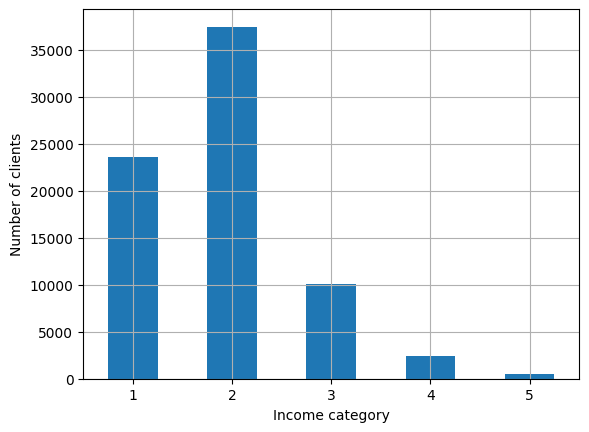

In [ ]:
bank_data_cleared['income_category'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of clients")
plt.show()

Let's see the proportions in numbers!

In [ ]:
bank_data_cleared['income_category'].value_counts() / len(bank_data_cleared)

,count
income_category,
2,0.505135
1,0.318817
3,0.136372
4,0.033307
5,0.006370


As we can see, the vast majority (over 80% !) of our samples concers people earning less than 200 thousand dollars a year. However, we should not completely exclude people making more money - we want our model to be somewhat versatile.

Let's split our dataset.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bank_data_cleared, test_size=0.1, stratify=bank_data_cleared["income_category"], random_state=42)

Now, lastly, let's verify if the proportions match, and remove the redundant column.

In [ ]:
train_set['income_category'].value_counts() / len(train_set)

,count
income_category,
2,0.505136
1,0.318823
3,0.136364
4,0.033304
5,0.006373


In [ ]:
test_set['income_category'].value_counts() / len(test_set)

,count
income_category,
2,0.505128
1,0.318758
3,0.136437
4,0.033333
5,0.006343


As we can see, the proportions are just fine. Let's remove the **income_category** column now - it will be of no use for us anymore.

In [ ]:
for set_ in [train_set, test_set]:
  set_.drop(columns=['income_category'], inplace=True)

Having prepared a nice little test set, let's put it aside for now and try to work further with our data.

# Exploratory Data Analysis - EDA

Let's try to explore the data. We will try to visualize it and look for correlations.

A little reminder about the structure of our data:

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66689 entries, 39950 to 54682
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   first_payment           66689 non-null  float64
 1   credit_amount           66689 non-null  float64
 2   credit_term             66689 non-null  int64  
 3   income                  66689 non-null  int64  
 4   month_payment           66689 non-null  float64
 5   gender                  66689 non-null  int64  
 6   number_of_children      66689 non-null  int64  
 7   married                 66689 non-null  int64  
 8   current_job_experience  66689 non-null  int64  
 9   general_job_experience  66689 non-null  int64  
 10  years_married           66689 non-null  int64  
 11  education               66689 non-null  int64  
 12  age                     66689 non-null  int64  
 13  work_position           66689 non-null  object 
 14  decision                66689 non-null 

First, let's try to calculate the linear (Pearson) correlation for our attributes, with regard to our target - the decision. We have to omit the **work_position** column, as it is not numeric.

In [ ]:
train_set.columns.drop('work_position')

Index(['first_payment', 'credit_amount', 'credit_term', 'income',
       'month_payment', 'gender', 'number_of_children', 'married',
       'current_job_experience', 'general_job_experience', 'years_married',
       'education', 'age', 'decision'],
      dtype='object')

In [ ]:
corr_matrix = train_set[train_set.columns.drop('work_position')].corr()
corr_matrix['decision'].sort_values(ascending=False)

,decision
decision,1.000000
first_payment,0.419282
current_job_experience,0.128668
years_married,0.104569
married,0.102607
education,0.102543
general_job_experience,0.096902
age,0.066408
number_of_children,0.012877
gender,0.007968


For proper interpretation of the results, we have to keep in mind that a "1" in the decsion column means the loan was accepted, while a "0" denotes rejection.

We can make some interesting observations:
- The amount of first payment shows a substantial positive corelation towards the decision, meaning that credits with a higher ratio of the first payment were more likely to be accepted.
- *credit_amount* shows a strong negative correlation with the decision, and so do *credit_term* and *month_payment* columns. It means that bigger loans are less likely to be accepted, and so do loans with longer term and smaller deposits.
-  *income* seems to have a smaller than expected correlation than expected.
- Factors such as job experience and marital status, as well as education, seem to have similar positive correlation with the result.

Let's try to visualize some data.

First, we have to consider non-trivial connections that might exist between the columns. For example, people with bigger work experience might earn more money - let's see if there is a correlation. To make it easier to see, we also add a trend line.

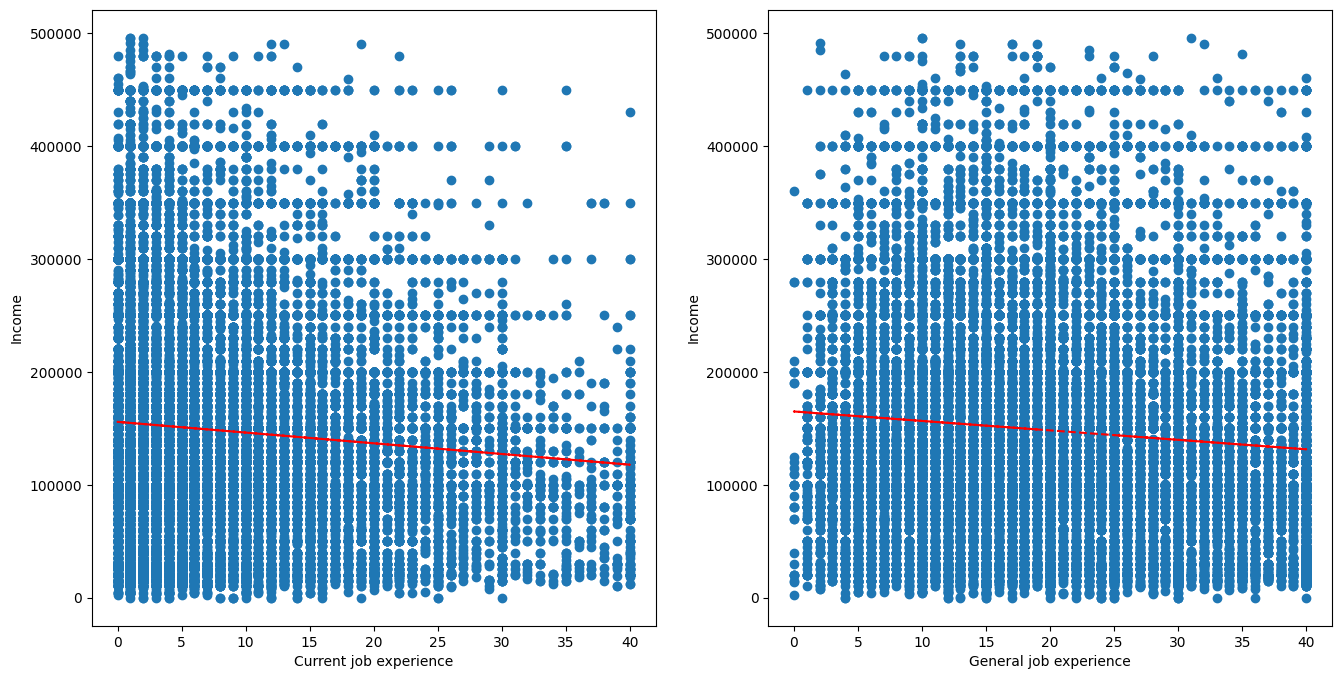

In [ ]:
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(train_set.current_job_experience, train_set.income)
axs[0].set_xlabel("Current job experience")
axs[0].set_ylabel("Income")
z = np.polyfit(train_set.current_job_experience, train_set.income, 1)
p = np.poly1d(z)
axs[0].plot(train_set.current_job_experience,p(train_set.current_job_experience),"r--")
axs[1].scatter(train_set.general_job_experience, train_set.income)
axs[1].set_xlabel("General job experience")
axs[1].set_ylabel("Income")
z = np.polyfit(train_set.general_job_experience, train_set.income, 1)
p = np.poly1d(z)
axs[1].plot(train_set.general_job_experience,p(train_set.general_job_experience),"r--")
plt.show()
for ax in axs:
  ax.grid()
plt.show()

As we can see, our assumption isn't true - actually, it's the opposite! However, the trend is not strong enough for us to rely on.

Nevertheless, let's try to come up with a different idea. It is not a bad thing to run into wrong assumptions - the problem appears when we do not check those assumptions and just stick with them.

Let's see if people with higher income are willing to pay higher monthly rates to get a loan. Let's add a trend line here too.

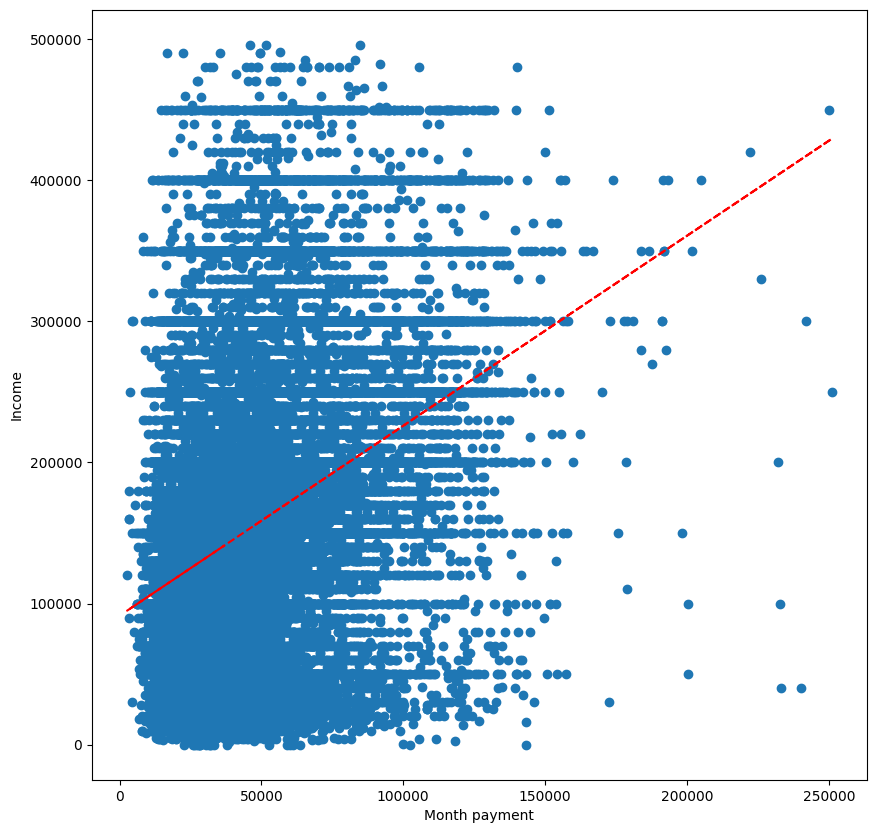

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
z = np.polyfit(train_set.month_payment, train_set.income, 1)
p = np.poly1d(z)
ax.scatter(train_set.month_payment, train_set.income)
ax.plot(train_set.month_payment, p(train_set.month_payment), "r--")
ax.set_xlabel("Month payment")
ax.set_ylabel("Income")
plt.show()

As we can see, with the growing income people are willing to pay higher rates - however, we have to keep in mind that it probably is also true that they take a bigger loan.

Let's take a look at two variables with similar, negative correlation. We would like to find out whether a longer term correlates with a bigger loan, as it is something we could sometimes take for granted.

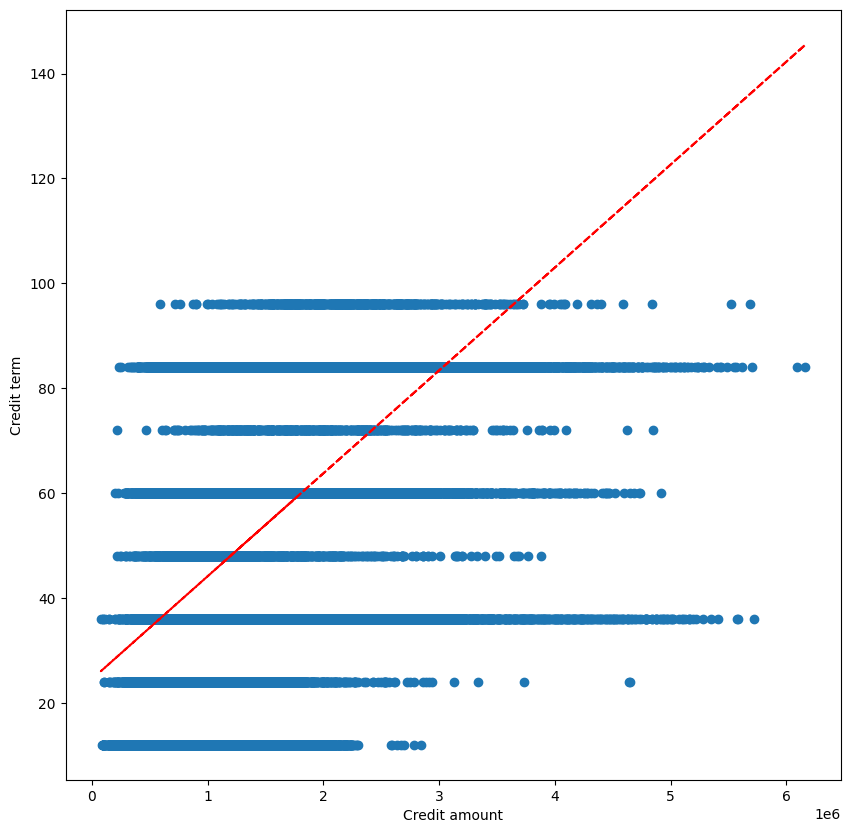

In [ ]:
z = np.polyfit(train_set.credit_amount, train_set.credit_term, 1)
p = np.poly1d(z)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(train_set.credit_amount, train_set.credit_term)
ax.plot(train_set.credit_amount, p(train_set.credit_amount), "r--")
ax.set_xlabel("Credit amount")
ax.set_ylabel("Credit term")
plt.show()

# train_set.plot(kind='scatter', x='credit_amount', y='credit_term', alpha=0.4)

Here, the first thing that we see is not actually the trend, but the fact that loans are usually taken for the term of an even year. We should probably take a different approach to this column, and make it a categorical one - we will address this issue later on.

Regarding the relation of the credit amount and its term, it clearly looks like the amount of the credit grows linearly with the term length.

Let's see if the amount of the first payment is connected with length of the credit's term.

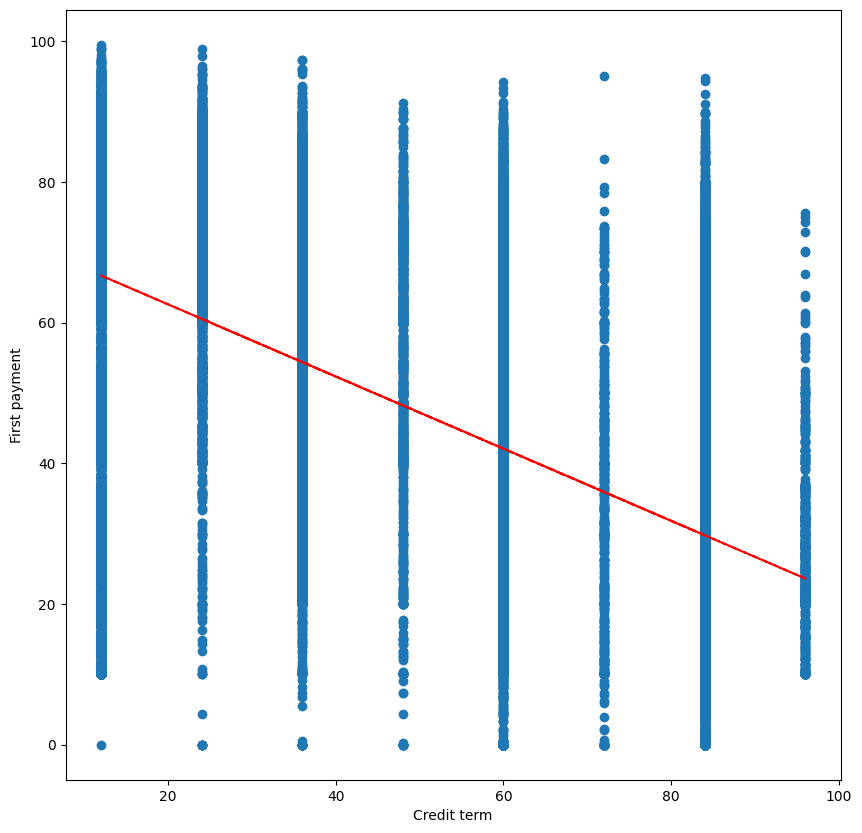

In [ ]:
z = np.polyfit(train_set.credit_term, train_set.first_payment, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(train_set.credit_term, train_set.first_payment)
ax.plot(train_set.credit_term, p(train_set.credit_term), "r--")
ax.set_xlabel("Credit term")
ax.set_ylabel("First payment")
plt.show()
# train_set.plot(kind='scatter', x='credit_term', y='first_payment', alpha=0.1)
plt.show()

As we can see, the amount of the first payment correlates negatively with the length of the credit term.

Now that we've got to know out data a little better, let's try to address the issue with the credit length being basically a categorical feature - we will make it a categorical feature!

In [ ]:
credit_terms = train_set[["credit_term"]]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
credit_terms_1hot = enc.fit_transform(credit_terms)

In [ ]:
credit_terms_1hot.toarray()[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
credit_terms_transformed = pd.DataFrame(credit_terms_1hot.toarray(), columns=enc.get_feature_names_out())
credit_terms_transformed.head(10)

,credit_term_12,credit_term_24,credit_term_36,credit_term_48,credit_term_60,credit_term_72,credit_term_84,credit_term_96
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have nicely encoded our lengths of the credit term. We should do the same to the numerical column **work_position**.

In [ ]:
work_pos = train_set[["work_position"]]
enc = OneHotEncoder()
work_pos_1hot = enc.fit_transform(work_pos)

In [ ]:
enc.get_feature_names_out()

array(['work_position_head_of_department',
       'work_position_head_of_organisation', 'work_position_other',
       'work_position_owner', 'work_position_seo',
       'work_position_soldier', 'work_position_specialist',
       'work_position_unknown', 'work_position_unskilled_worker',
       'work_position_worker'], dtype=object)

In [ ]:
work_pos_transformed = pd.DataFrame(work_pos_1hot.toarray(), columns=enc.get_feature_names_out())
work_pos_transformed.head(10)

,work_position_head_of_department,work_position_head_of_organisation,work_position_other,work_position_owner,work_position_seo,work_position_soldier,work_position_specialist,work_position_unknown,work_position_unskilled_worker,work_position_worker
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


And the same for **education** - however, here we should at first make a slight change which will work nicely with automatic inference of column names. The dataset provides us with the following names for the numbers in this column:
- 1 - School
- 2 - College
- 3 - Bachelor
- 4 - Master
- 5 - Postgraduate

However, while we explore the data, we find out that there are exactly 4 rows which lack this information, and have a 0 instead - let's drop those rows.

Let's put them to use!

In [ ]:
edu = train_set[["education"]]
edu.replace({1 : "school", 2 : "college", 3 : "bachelor", 4 : "master" , 5 : "postgraduate"}, inplace=True)
enc = OneHotEncoder()
edu_1hot = enc.fit_transform(edu)

<ipython-input-41-87e1ed015b04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu.replace({1 : "school", 2 : "college", 3 : "bachelor", 4 : "master" , 5 : "postgraduate"}, inplace=True)


In [ ]:
enc.get_feature_names_out()

array(['education_bachelor', 'education_college', 'education_master',
       'education_postgraduate', 'education_school'], dtype=object)

In [ ]:
edu_transformed = pd.DataFrame(edu_1hot.toarray(), columns=enc.get_feature_names_out())
edu_transformed.head(10)

,education_bachelor,education_college,education_master,education_postgraduate,education_school
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0


Nice! We've prepared our problematic columns - we just have to remember to drop the initial ones when we will be creating a data preparation pipeline.

# Data transformation and scaling

Most of the machine learning methods benefit from the fact of data being from a certain distribution (ideally - Gaussian), as well as similar scale. By transforming and scaling our data, we can prevent gradient explosions and vanishing. Let's do that.

First, we are going to create a custom data transformer to preprocess data that have multiple **modas**. A moda can be seen as a peak in the data histogram - for example, **general_job_experience** column has multiple modas, which we should take care of.

We are going to take a logarithm from those values to smooth out the distribution - however, to avoid zero-division, we will replace all 0's with a very small positive number.

In [ ]:
general_job_exp = train_set[['general_job_experience']]

In [ ]:
print(np.max(general_job_exp))
print(np.min(general_job_exp))

40
0


In [ ]:
general_job_exp.replace(0, 1e-2, inplace=True)

<ipython-input-46-9e90a108ddec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_job_exp.replace(0, 1e-2, inplace=True)


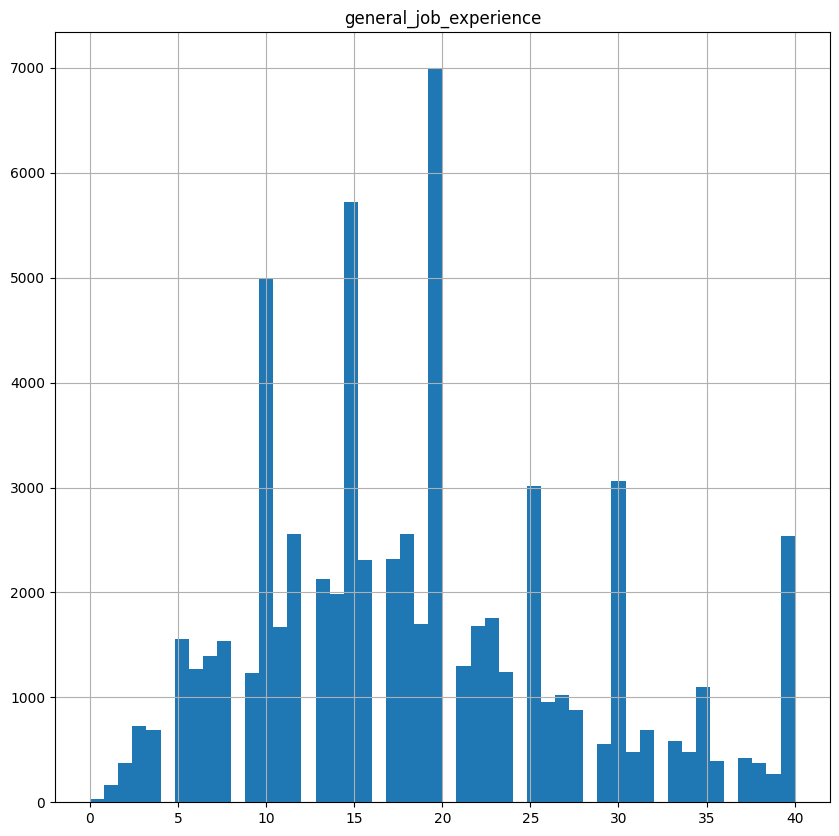

In [ ]:
general_job_exp.hist(bins=50, figsize=(10,10))
plt.show()

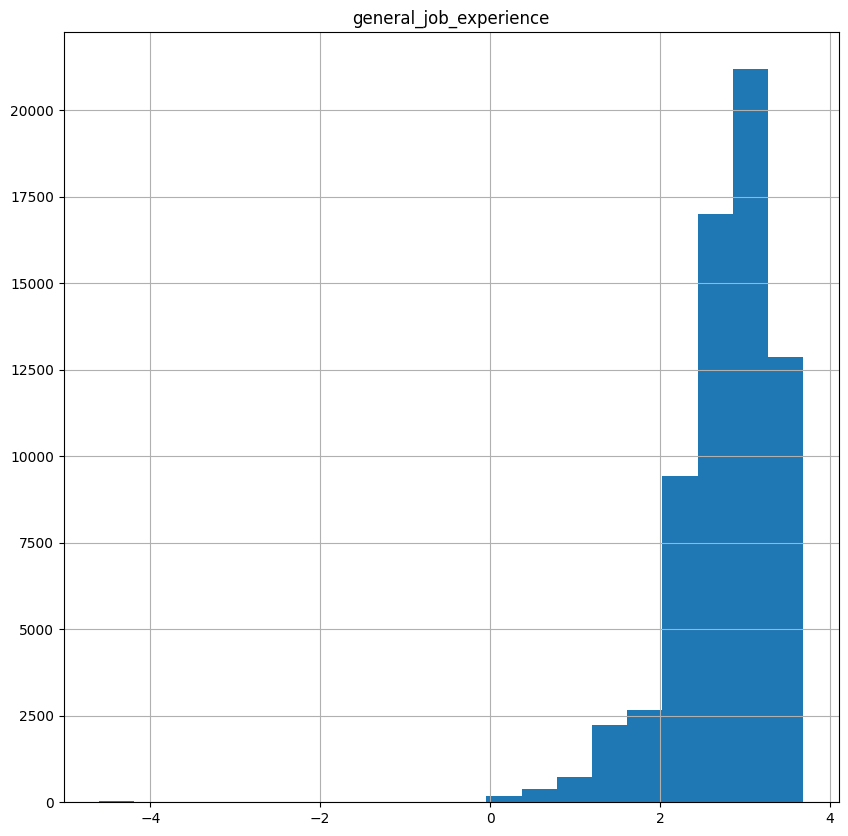

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log)

general_job_exp_transformed = log_transformer.transform(general_job_exp)

general_job_exp_df = pd.DataFrame(general_job_exp_transformed, columns=['general_job_experience'])
general_job_exp_df.hist(bins=20, figsize=(10,10))
plt.show()

We've brought this distribution to something a little closer to a Gaussian. Let's do the same for **first_payment**.

<ipython-input-49-02b36c814b7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_payment.replace(0, 1e-2, inplace=True)


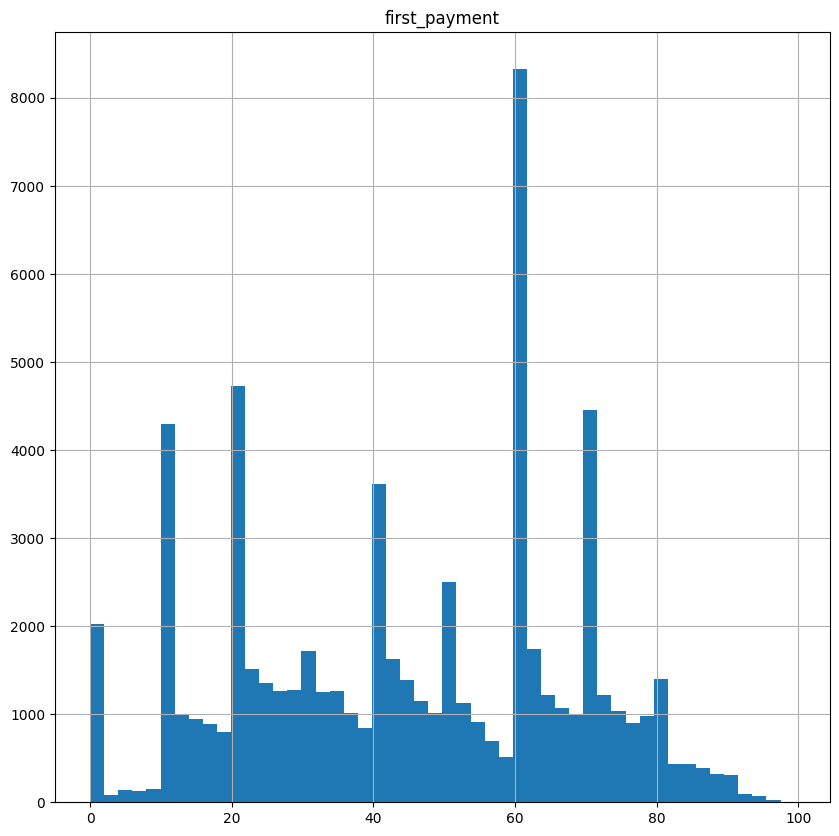

In [ ]:
first_payment = train_set[['first_payment']]
first_payment.replace(0, 1e-2, inplace=True)
first_payment.hist(bins=50, figsize=(10,10))
plt.show()

99.5
0.01


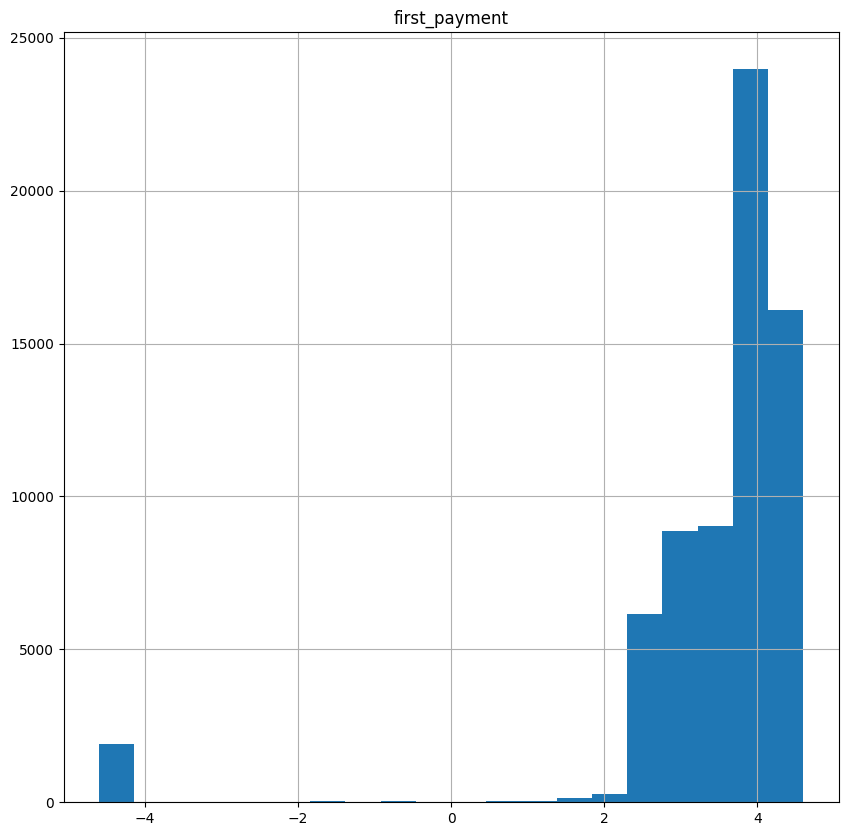

In [ ]:
print(np.max(first_payment))
print(np.min(first_payment))

first_payment_transformed = log_transformer.transform(first_payment)

first_payment_transformed_df = pd.DataFrame(first_payment_transformed, columns=['first_payment'])
first_payment_transformed_df.hist(bins=20, figsize=(10,10))
plt.show()

We have a little bit more outliers here, but it should suffice.

Now, let's try to work out way through **current_job_experience**.

<ipython-input-51-9004f9ce96f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_job_exp.replace(0, 1e-2, inplace=True)


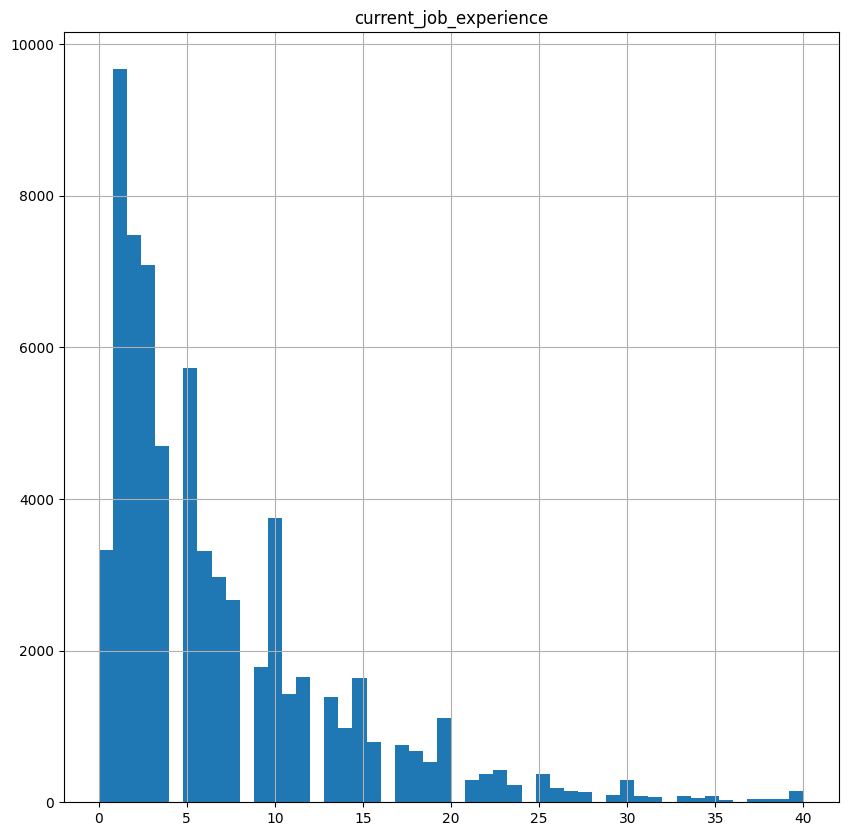

In [ ]:
current_job_exp = train_set[['current_job_experience']]
current_job_exp.replace(0, 1e-2, inplace=True)
current_job_exp.hist(bins=50, figsize=(10,10))
plt.show()

This one is just skewed right - let's apply the LogTransformer once more!

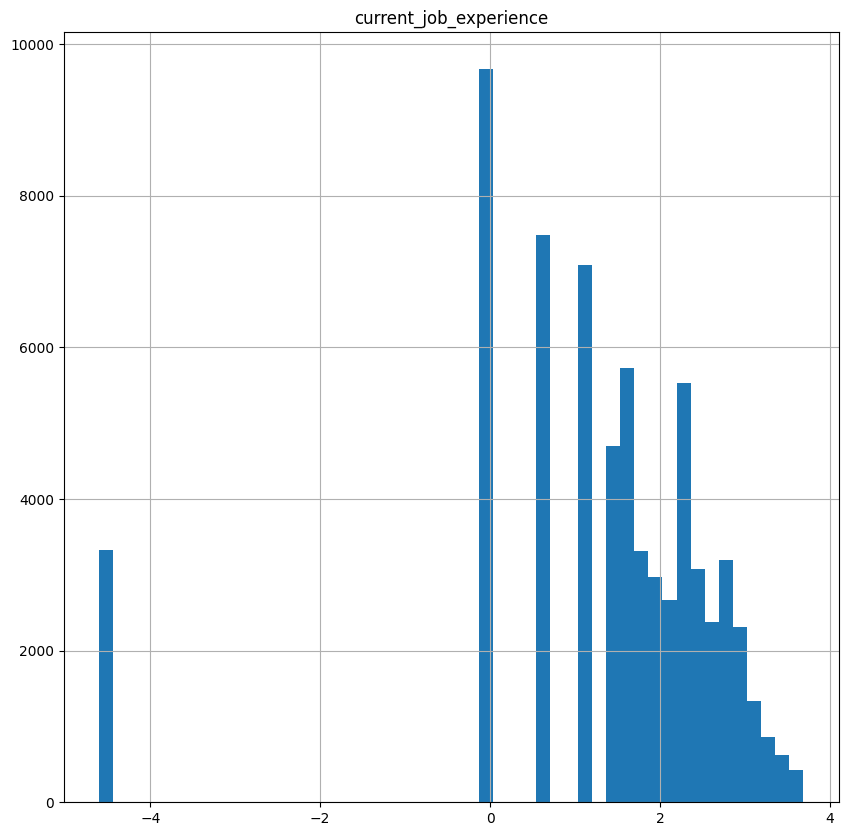

In [ ]:
current_job_exp_transformed = log_transformer.transform(current_job_exp)

current_job_exp_transformed_df = pd.DataFrame(current_job_exp_transformed, columns=['current_job_experience'])
current_job_exp_transformed_df.hist(bins=50, figsize=(10,10))
plt.show()

Unluckily, here we also have some outliers on the left, and it's more than before - let's try with the RBF.

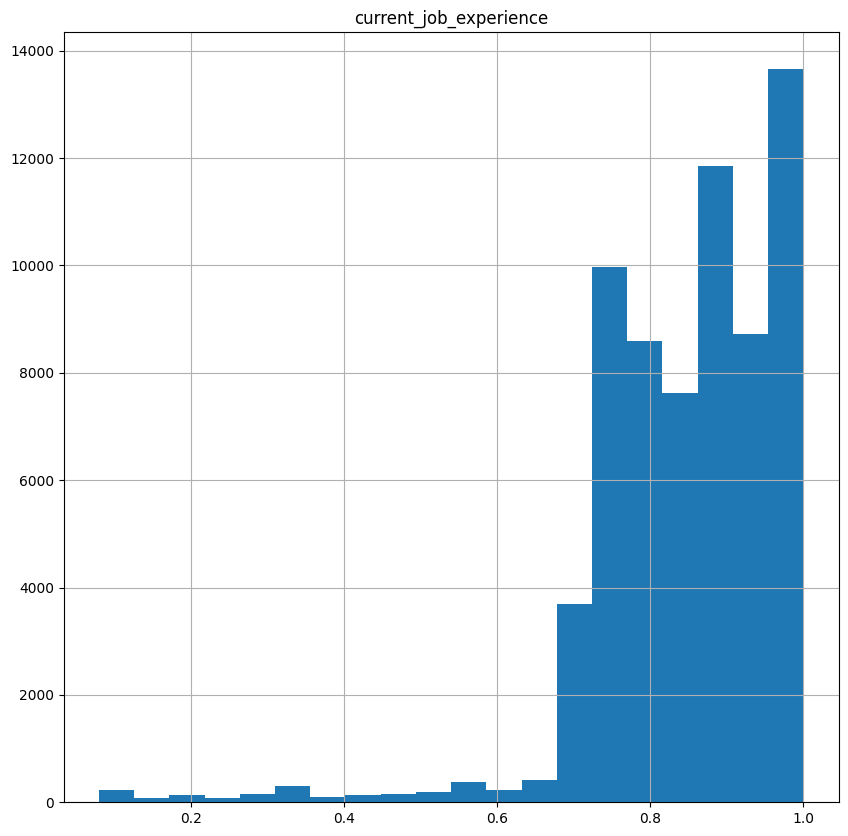

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[11.]], gamma=0.003))

current_job_exp_transformed = rbf_transformer.fit_transform(current_job_exp)
# current_job_exp_transformed = log_transformer.transform(current_job_exp)

current_job_exp_transformed_df = pd.DataFrame(current_job_exp_transformed, columns=['current_job_experience'])
current_job_exp_transformed_df.hist(bins=20, figsize=(10,10))
plt.show()

This is the best we've got with the RBF transformer. Let's stick with this result.

Now, it would be nice to scale our data and look at have a final look at it - but to do so, we have to somehow gather our transformed pieces. That's why we will first construct a pipeline, which will temporarily work on a copy of our training set.

In [ ]:
temp_train_set = train_set.copy()
X, y = temp_train_set.drop(columns=['decision']), temp_train_set['decision']

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector

to_log_transform = ['general_job_experience', 'first_payment', 'current_job_experience']
to_rbf_transform = ['credit_amount']
to_one_hot = ['education', 'work_position']

def replace_zeros(df, columns):
  for col in columns:
    df[col] = df[col].replace(0, 1e-2)
  return df

# In order for our LogTransformer to work, we need to make sure there are only nonzero values in the set
# for col_name in to_log_transform:
#   X[col_name].replace(0.0, 1e-2, inplace=True)

replace_zero_transformer = FunctionTransformer(replace_zeros, kw_args=dict(columns=to_log_transform), feature_names_out='one-to-one')
log_transformer = FunctionTransformer(np.log, feature_names_out='one-to-one')
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[11.]], gamma=0.003), feature_names_out='one-to-one')

enc = OneHotEncoder()
sc = StandardScaler()

log_pipeline = make_pipeline(replace_zero_transformer, log_transformer, StandardScaler())
rbf_pipeline = make_pipeline(rbf_transformer, StandardScaler())
sc_pipeline = make_pipeline(StandardScaler())

full_pipeline = ColumnTransformer([
  ("log", log_pipeline, to_log_transform),
  ("rbf", rbf_pipeline, to_rbf_transform),
  ("onehot", enc, to_one_hot)
  ], remainder=sc_pipeline)

temp_train_set_transformed = full_pipeline.fit_transform(X)
full_pipeline.get_feature_names_out()

array(['log__general_job_experience', 'log__first_payment',
       'log__current_job_experience', 'rbf__credit_amount',
       'onehot__education_1', 'onehot__education_2',
       'onehot__education_3', 'onehot__education_4',
       'onehot__education_5', 'onehot__work_position_head_of_department',
       'onehot__work_position_head_of_organisation',
       'onehot__work_position_other', 'onehot__work_position_owner',
       'onehot__work_position_seo', 'onehot__work_position_soldier',
       'onehot__work_position_specialist',
       'onehot__work_position_unknown',
       'onehot__work_position_unskilled_worker',
       'onehot__work_position_worker', 'remainder__credit_term',
       'remainder__income', 'remainder__month_payment',
       'remainder__gender', 'remainder__number_of_children',
       'remainder__married', 'remainder__years_married', 'remainder__age'],
      dtype=object)

Notice how we left out the **decision** column - it's not supposed to be processed, because it's our target. We could process it, for example, in regression, where a model would predict a continuous value - however, we would have to apply an inverse transform later to get the result in the correct format.

In [ ]:
temp_train_set_transformed_df = pd.DataFrame(temp_train_set_transformed, columns = full_pipeline.get_feature_names_out())
temp_train_set_transformed_df.head()

,log__general_job_experience,log__first_payment,log__current_job_experience,rbf__credit_amount,onehot__education_1,onehot__education_2,onehot__education_3,onehot__education_4,onehot__education_5,onehot__work_position_head_of_department,...,onehot__work_position_unskilled_worker,onehot__work_position_worker,remainder__credit_term,remainder__income,remainder__month_payment,remainder__gender,remainder__number_of_children,remainder__married,remainder__years_married,remainder__age
0,0.260680,0.539533,-0.090957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-1.115205,0.618319,0.218008,0.720278,-0.791538,-1.667693,-0.976310,0.318265
1,0.260680,0.004676,0.084933,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-1.115205,1.593063,1.742213,-1.388353,1.491631,0.599631,0.563906,-0.306734
2,-0.503485,0.193275,-0.090957,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.186232,1.471220,-0.356569,0.720278,-0.791538,0.599631,-0.013675,-0.619234
3,0.717045,-0.286376,1.205387,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.053856,1.836749,0.460200,-1.388353,-0.791538,0.599631,-0.591256,1.359930
4,-1.177740,0.496734,0.332838,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-1.115205,-0.478269,-0.367392,0.720278,-0.791538,-1.667693,-0.976310,-1.452566


Nice! We have succesfully prepared our data. Let's get to the training section then!

# Train the model

Let's start simple - preprocess our dataset and try a logistic regression classifier.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

X_train, y_train = train_set.drop(columns=['decision']), train_set['decision']

model_pipeline = make_pipeline(
    full_pipeline,
    LogisticRegression()
)

model_pipeline.fit(X_train, y_train)

scores = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])


Let's look at the performance of our model. We will only look at the *test_...* metrics - they are calculated over the validation dataset, and they should give us a better insight into the model's performance.

In [ ]:
scores

{'fit_time': array([0.35193801, 0.3307519 , 0.3278594 , 0.31621933, 0.34128308]),
 'score_time': array([0.09257197, 0.08873963, 0.09920645, 0.09122586, 0.08830404]),
 'test_accuracy': array([0.82096266, 0.81863848, 0.82126256, 0.82418653, 0.82087426]),
 'test_precision': array([0.82781775, 0.82613555, 0.82806877, 0.82933845, 0.82742373]),
 'test_recall': array([0.97790368, 0.97724268, 0.9779016 , 0.98026254, 0.97846822]),
 'test_f1': array([0.89662338, 0.89535839, 0.89676972, 0.89850682, 0.89662931]),
 'test_roc_auc': array([0.78633736, 0.78941718, 0.78040611, 0.7870705 , 0.78925557])}

As we can see, our model performs quite well - it achieves .82 accuracy, while maintaining high recall, which means that the model is sensitive to changes of all the parameters. Let's see if we can do better with a decision tree classifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_pipeline = make_pipeline(
    full_pipeline,
    DecisionTreeClassifier()
)

model_pipeline.fit(X_train, y_train)

scores = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
scores

{'fit_time': array([0.70084095, 0.67586637, 0.69813466, 0.67954063, 0.69091105]),
 'score_time': array([0.06914592, 0.0676949 , 0.06878519, 0.06567788, 0.07934785]),
 'test_accuracy': array([0.77507872, 0.76998051, 0.76855601, 0.77267956, 0.77423708]),
 'test_precision': array([0.85727735, 0.85771352, 0.85642341, 0.85859353, 0.86058241]),
 'test_recall': array([0.8598678 , 0.85155807, 0.8511663 , 0.85437718, 0.85399943]),
 'test_f1': array([0.85857062, 0.85462472, 0.85378677, 0.85648017, 0.85727829]),
 'test_roc_auc': array([0.65409693, 0.65358107, 0.65075594, 0.65620258, 0.66044222])}

The tree does not achieve better performance with the basic settings. Let's try an ensemble model, such as RandomForest. This one will probably take a little longer to train, so we will just take 10 trees into each instance of the forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_pipeline = make_pipeline(
    full_pipeline,
    RandomForestClassifier(n_estimators=10)
)

model_pipeline.fit(X_train, y_train)

scores = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
scores

{'fit_time': array([1.2360065 , 1.01634932, 0.98390532, 1.02611661, 1.1265583 ]),
 'score_time': array([0.12635374, 0.13637924, 0.1286459 , 0.13003254, 0.12552381]),
 'test_accuracy': array([0.82516119, 0.82321188, 0.82973459, 0.83070925, 0.82784734]),
 'test_precision': array([0.86826614, 0.86638775, 0.87280387, 0.87335305, 0.87078601]),
 'test_recall': array([0.91926346, 0.9190746 , 0.91953914, 0.92020021, 0.91963358]),
 'test_f1': array([0.89303734, 0.89195381, 0.8955622 , 0.89616481, 0.89454345]),
 'test_roc_auc': array([0.79372553, 0.79658553, 0.80489563, 0.80784803, 0.79739349])}

As we can see, even 10 trees do not outperform the linear model - it means that we can try going further with the size of our model!

In [ ]:
model_pipeline = make_pipeline(
    full_pipeline,
    RandomForestClassifier(n_estimators=30)
)

model_pipeline.fit(X_train, y_train)

scores = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
scores

{'fit_time': array([3.65559149, 3.92271686, 2.93146896, 2.94581032, 3.14082885]),
 'score_time': array([0.3509798 , 0.27094793, 0.27602339, 0.26090312, 0.33038282]),
 'test_accuracy': array([0.83468286, 0.83273354, 0.83745689, 0.84060579, 0.84164355]),
 'test_precision': array([0.86257892, 0.86183014, 0.86476653, 0.86773268, 0.86763813]),
 'test_recall': array([0.94183192, 0.94003777, 0.94267636, 0.94295968, 0.94465955]),
 'test_f1': array([0.90046495, 0.89923671, 0.90204229, 0.90378349, 0.90451216]),
 'test_roc_auc': array([0.82643488, 0.82794298, 0.82257   , 0.83654513, 0.83081972])}

We manage to bump the accuracy up by one percentage point in comparison to our non-regularized logistic regression. We see some improvement from the smaller model - let's try to increase the size even further and see if we can get more information.

In [ ]:
model_pipeline = make_pipeline(
    full_pipeline,
    RandomForestClassifier(n_estimators=100)
)

model_pipeline.fit(X_train, y_train)

scores = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

scores

{'fit_time': array([10.82450318, 10.90331221, 10.78215599, 10.85315967, 10.75626826]),
 'score_time': array([0.72751784, 0.7370019 , 0.74470925, 0.74504542, 0.7360568 ]),
 'test_accuracy': array([0.8382816 , 0.83985605, 0.84240516, 0.84465437, 0.84426783]),
 'test_precision': array([0.86072376, 0.86239712, 0.86322006, 0.86581909, 0.86525918]),
 'test_recall': array([0.95004721, 0.94985836, 0.95240344, 0.95183681, 0.95212012]),
 'test_f1': array([0.90318237, 0.90401726, 0.90562141, 0.90679262, 0.90661391]),
 'test_roc_auc': array([0.83688668, 0.83911139, 0.8365799 , 0.84447159, 0.84048884])}

We got a very small improvement, for which we paid with training time. Let's employ a different approach - we will try randomized parameter optimization, to see in which direction we should go.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint
model_pipeline = Pipeline([
    ('preprocessing', full_pipeline),
    ('random_forest', RandomForestClassifier())
])

param_distr = {'random_forest__n_estimators' : randint(low=10, high=50),
               'random_forest__min_samples_split' : randint(low=2, high=5)}

rand_search = RandomizedSearchCV(model_pipeline, param_distributions=param_distr, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)

rand_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('log',
                                                                               Pipeline(steps=[('functiontransformer-1',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<function replace_zeros at 0x7b01096c67a0>,
                                                                                                                    kw_args={'columns': ['general_job_experience...
                                                                               OneHotEncoder(),
                                                                               ['education',
                                                                                'work_position'])])),
                                             ('random_forest',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'random_forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b011c4a4880>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b011c4a5ed0>},
                   scoring='roc_auc')

In [ ]:
final_model = rand_search.best_estimator_

feature_importances = final_model['random_forest'].feature_importances_

sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse=True)

[(0.24384653499714226, 'log__first_payment'),
 (0.1635591348876031, 'remainder__month_payment'),
 (0.09736246953925536, 'remainder__age'),
 (0.08540913902959224, 'remainder__income'),
 (0.07839503792765433, 'log__general_job_experience'),
 (0.07377935760513397, 'log__current_job_experience'),
 (0.06307406243558987, 'remainder__years_married'),
 (0.06091636015191356, 'remainder__credit_term'),
 (0.0295531324035438, 'remainder__number_of_children'),
 (0.016852627251189724, 'remainder__gender'),
 (0.010903213264185556, 'onehot__work_position_specialist'),
 (0.010678810926321022, 'remainder__married'),
 (0.010245468493113724, 'onehot__education_4'),
 (0.008665510190137084, 'onehot__work_position_head_of_department'),
 (0.007553938278191625, 'onehot__work_position_unknown'),
 (0.007219702492401869, 'onehot__work_position_owner'),
 (0.006947169635445695, 'onehot__education_2'),
 (0.006506617810550797, 'onehot__work_position_head_of_organisation'),
 (0.006039200496451724, 'onehot__work_positi

We have successfully chosen the best estimator. As it turns out, the most important features are the ratio of first payment to the total amount of the loan and the monthly payment. Surprisingly, the credit amount turns out to have no impact on the decision, which means it probably is strongly connected to other features!

If we wanted to push the results even further, we could try more techniques to get better results, such as:
- GridSearchCV
- usage of different models
- more sophisticated feature engineering
- model regularization
- neural networks.

In our case, let's test the model we've developed on the testing data.

# Testing the model

To test the model, we have to apply the same preprocessing to the test set that we applied to the training one, and then ONLY PREDICT the results. Let's do it!

In [ ]:
X_test, y_test = test_set.drop(columns=['decision']), test_set['decision']

replace_zero_transformer = FunctionTransformer(replace_zeros, kw_args=dict(columns=to_log_transform), feature_names_out='one-to-one')
log_transformer = FunctionTransformer(np.log, feature_names_out='one-to-one')
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[11.]], gamma=0.003), feature_names_out='one-to-one')

enc = OneHotEncoder()
sc = StandardScaler()

final_estimator = final_model['random_forest']

log_pipeline = make_pipeline(replace_zero_transformer, log_transformer, StandardScaler())
rbf_pipeline = make_pipeline(rbf_transformer, StandardScaler())
sc_pipeline = make_pipeline(StandardScaler())

full_pipeline = ColumnTransformer([
  ("log", log_pipeline, to_log_transform),
  ("rbf", rbf_pipeline, to_rbf_transform),
  ("onehot", enc, to_one_hot)
  ], remainder=sc_pipeline)

X_test_transformed = full_pipeline.fit_transform(X_test)

y_pred = final_estimator.predict(X_test_transformed)

print(f"Scores:\nAccuracy: {accuracy_score(y_test, y_pred)}\nF1 score: {f1_score(y_test, y_pred)}\nROC/AUC: {roc_auc_score(y_test, y_pred)}\nRecall: {recall_score(y_test, y_pred)}")


Scores:
Accuracy: 0.8396761133603239
F1 score: 0.904424778761062
ROC/AUC: 0.6762054981250221
Recall: 0.9501352265043949


Great! Our model achieved almost 84% accuracy on the testing set - quite impressive for a small random forest model. To top it off, we've achieved an impressive 0.95 score for the recall metric, which means our model is very good at capturing even small changes in the data.

# Conclusion

In this exercise, we went through all standard steps of developing a machine learning model:
- we performed data acquisition by finding a dataset,
- we cleaned the data - removed extreme outliers, missing values, unnecessary columns,
- we explored the data to find out what connections might exist between the features
- we performed feature engineering - transformed the data and scaled it
- we chose a suitable model by considering different options
- we trained the model, fine-tuned its parameters, and verified its performance on a validation set
- we tested the model on new, unseen data, and proved its performance.

Of course, many more things could be done for further improvement:
- more extensive feature engineering - combining features together to obtain better embeddings, removal of features with low importance,
- consideration of more models,
- more extensive model tuning - searching a wider range of hyperparameter space, employ GridSearch after RandomSearch for better control of the values of hyperparameters, employment of model regularization,
- simply gather more data.

Lastly, if we wanted to deploy our model in a production environment, we should write scripts, which would automatically perform the steps we took manually in this notebook. But this is already out of the scope of this exercise.

Thank you for reading and see you in the next one!